# Importing All the Necessary Libraries

In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading the Data 

In [485]:
Data = pd.read_csv(r"C:\Users\navee\Machine learning Projects\Pizza Price Prediction\pizza_v1.csv")
Data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no


In [486]:
Data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [487]:
Data.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no
128,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no


In [488]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [489]:
Data.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


# Checking the Null values 

In [490]:
Data.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

# Data Preprocessing

In [491]:
Data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [492]:
# Renaming the Column name 
Data.rename({'price_rupiah':'Price'},axis=1,inplace=True)

In [493]:
Data.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [494]:
Data['Price'] = Data['Price'].str.replace('Rp','')
Data['Price'] = Data['Price'].str.replace(',','').astype('int32')

In [495]:
Data.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


In [496]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   Price         129 non-null    int32  
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), int32(1), object(6)
memory usage: 7.7+ KB


In [497]:
Data['Price'] = [x*0.0054 for x in Data['Price']]

In [498]:
Data.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,837.0,14.0,smoked beef,double_signature,reguler,yes,no
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no


In [499]:
Data['diameter'].dtype

dtype('float64')

# Exploratory Data Analysis

# Univariant Analysis

In [500]:
Data.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [501]:
Data['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

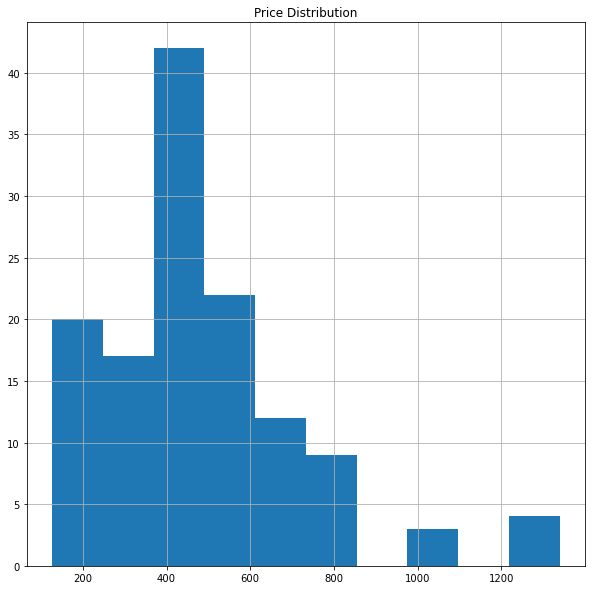

In [502]:
plt.figure(figsize=(10,10))
Data['Price'].hist()
plt.title('Price Distribution')
plt.show()

In [503]:
Data['diameter'].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

<AxesSubplot:xlabel='diameter', ylabel='count'>

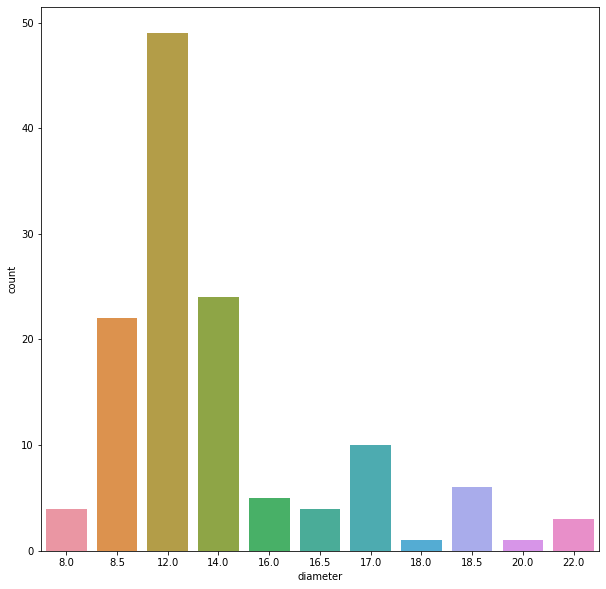

In [504]:
plt.figure(figsize=(10,10))
sns.countplot(x='diameter',data=Data)

In [505]:
Data['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked beef     19
tuna             9
vegetables       9
meat             8
black papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

<AxesSubplot:xlabel='count', ylabel='topping'>

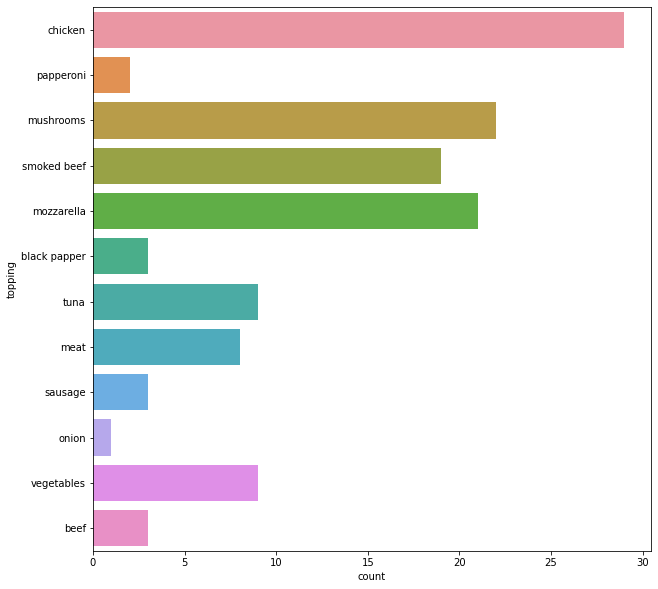

In [506]:
plt.figure(figsize=(10,10))
sns.countplot(y='topping',data=Data)

In [507]:
Data['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

<AxesSubplot:xlabel='count', ylabel='variant'>

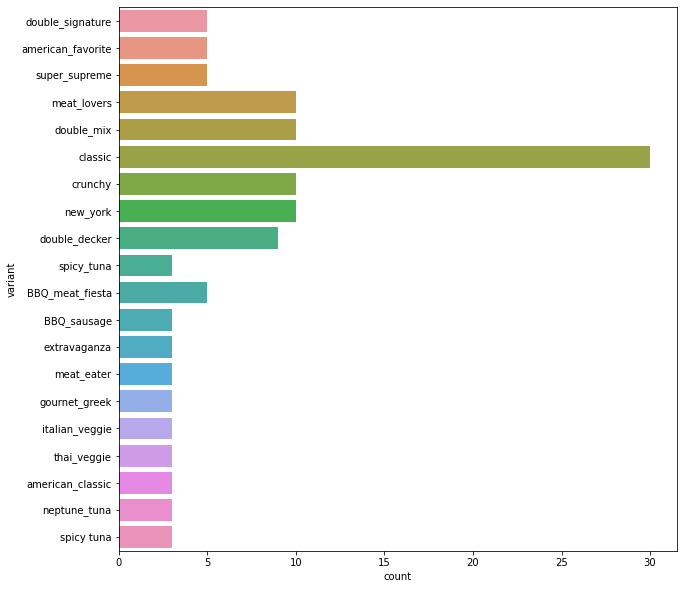

In [508]:
plt.figure(figsize=(10,10))
sns.countplot(y='variant',data=Data)

In [509]:
Data['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

<AxesSubplot:xlabel='count', ylabel='size'>

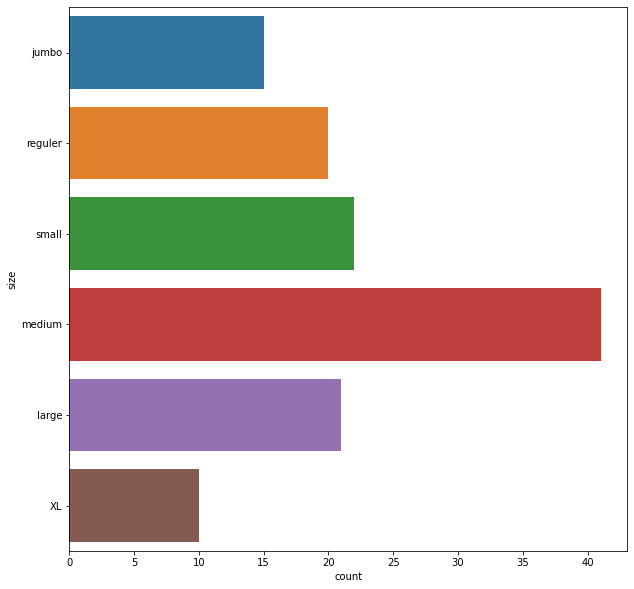

In [510]:
plt.figure(figsize=(10,10))
sns.countplot(y='size',data=Data)

In [511]:
Data['extra_sauce'].value_counts()

yes    76
no     53
Name: extra_sauce, dtype: int64

<AxesSubplot:xlabel='extra_sauce', ylabel='count'>

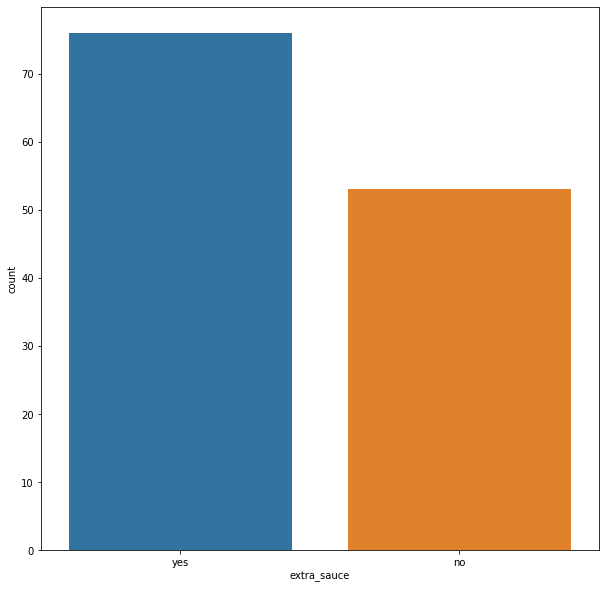

In [512]:
plt.figure(figsize=(10,10))
sns.countplot(x='extra_sauce',data=Data)

In [513]:
Data['extra_cheese'].value_counts()

yes    86
no     43
Name: extra_cheese, dtype: int64

<AxesSubplot:xlabel='extra_cheese', ylabel='count'>

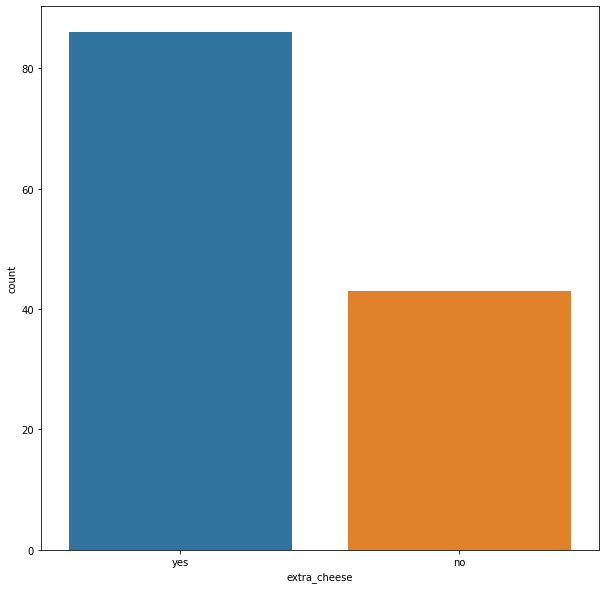

In [514]:
plt.figure(figsize=(10,10))
sns.countplot(x='extra_cheese',data=Data)

# Bivariant Analysis

Price by Company 

In [515]:
Data.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

<AxesSubplot:xlabel='company', ylabel='Price'>

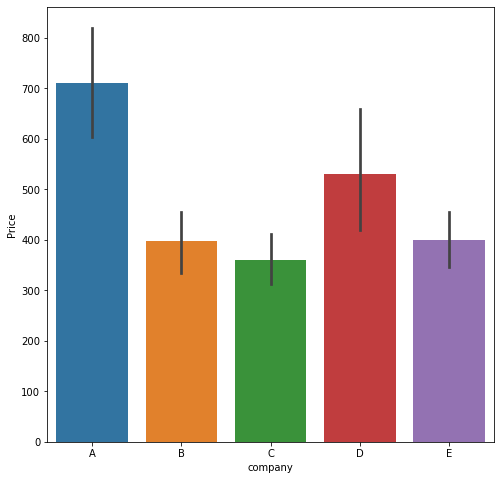

In [516]:
plt.figure(figsize=(8,8))
sns.barplot(x='company',y='Price',data=Data)

Price by topping

In [517]:
Data.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

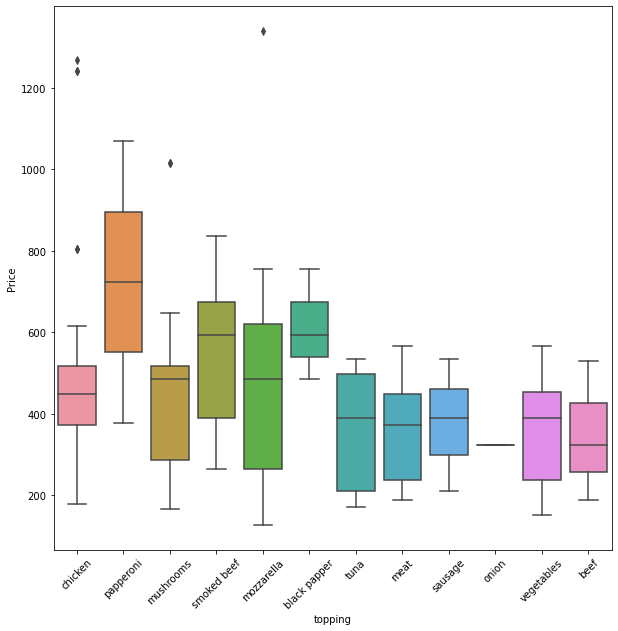

In [518]:
plt.figure(figsize=(10,10))
sns.boxplot(x='topping',y='Price',data=Data)
plt.xticks(rotation = 45)
plt.show()

Price by Size

In [519]:
Data.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

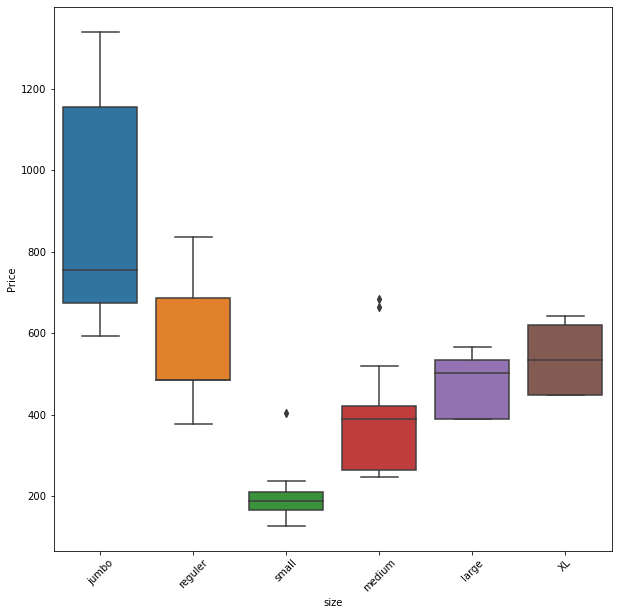

In [520]:
plt.figure(figsize=(10,10))
sns.boxplot(x='size',y='Price',data=Data)
plt.xticks(rotation = 45)
plt.show()

# Finding the Most Expensive Pizza 

In [521]:
Data.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [522]:
Data['Price'].sort_values(ascending=False)

4      1339.2
0      1269.0
84     1242.0
20     1242.0
1      1069.2
        ...  
31      167.4
67      151.2
89      126.9
100     126.9
25      126.9
Name: Price, Length: 129, dtype: float64

In [523]:
Data[Data['Price']==1339.2]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no


# Finding the Daiameter of Jumbo size Pizzas

In [524]:
Data[Data['size']=='jumbo']['diameter']

0     22.0
1     20.0
4     18.0
5     18.5
6     16.0
10    18.5
11    16.0
15    18.5
16    16.0
20    22.0
21    18.5
79    18.5
80    16.0
84    22.0
85    18.5
Name: diameter, dtype: float64

In [525]:
Data[Data['size']=='XL']

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese
29,B,448.2,17.0,chicken,new_york,XL,no,yes
35,B,621.0,17.0,mozzarella,new_york,XL,no,yes
41,B,642.6,17.0,mushrooms,new_york,XL,yes,no
47,B,448.2,17.0,chicken,new_york,XL,no,yes
93,D,448.2,17.0,chicken,new_york,XL,no,yes
99,E,621.0,17.0,mozzarella,new_york,XL,no,yes
104,E,448.2,17.0,chicken,new_york,XL,no,yes
110,E,621.0,17.0,mozzarella,new_york,XL,no,yes
116,E,642.6,17.0,mushrooms,new_york,XL,yes,no
122,E,448.2,17.0,chicken,new_york,XL,no,yes


# Removing Outliers 

In [526]:
Data[(Data['size']=='jumbo') &  (Data['diameter'] <=16)]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese
6,A,594.0,16.0,smoked beef,american_favorite,jumbo,no,yes
11,A,594.0,16.0,black papper,super_supreme,jumbo,yes,yes
16,A,594.0,16.0,smoked beef,meat_lovers,jumbo,no,yes
80,D,594.0,16.0,smoked beef,meat_lovers,jumbo,no,yes


In [527]:
Data = Data.drop(Data.index[[6,11,16,80]])

In [528]:
Data.shape

(125, 8)

# Label Encoding

In [529]:
Data.select_dtypes(include=['object'])

,company,topping,variant,size,extra_sauce,extra_cheese
0,A,chicken,double_signature,jumbo,yes,yes
1,A,papperoni,double_signature,jumbo,yes,yes
2,A,mushrooms,double_signature,reguler,yes,yes
3,A,smoked beef,double_signature,reguler,yes,no
4,A,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...
124,E,tuna,spicy tuna,small,yes,yes
125,E,tuna,spicy tuna,medium,yes,yes
126,E,tuna,spicy tuna,large,yes,yes
127,E,meat,BBQ_meat_fiesta,small,yes,no


In [530]:
cat_col= Data.select_dtypes(include=['object']).columns
cat_col

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese'], dtype='object')

In [531]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [532]:
for i in cat_col:
    Data[i] = le.fit_transform(Data[i])

In [533]:
Data.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,1269.0,22.0,2,8,1,1,1
1,0,1069.2,20.0,7,8,1,1,1
2,0,648.0,16.0,5,8,4,1,1
3,0,837.0,14.0,9,8,4,1,0
4,0,1339.2,18.0,4,8,1,1,0


# Storing the Feature matrix in X and target in vector y

In [534]:
X = Data.drop('Price',axis=1)
y = Data['Price']

# Splitting the data into training and testing data

In [535]:
from sklearn.model_selection import train_test_split

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Importing the Models 

In [537]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [538]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


# Model Training 

In [539]:
LR = LinearRegression()
LR.fit(X_train,y_train)


SVR = SVR()
SVR.fit(X_train,y_train)

RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)

GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)

XGB = XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Prediction on test Data

In [540]:
y_pred1 = LR.predict(X_test)
y_pred2 = SVR.predict(X_test)
y_pred3 = RFR.predict(X_test)
y_pred4 = GBR.predict(X_test)
y_pred5 = XGB.predict(X_test)

# Evaluating the Algorithms 

In [541]:
from sklearn.metrics import r2_score

In [542]:
LR_Score = r2_score(y_test,y_pred1)
SVR_Score = r2_score(y_test,y_pred2)
RFR_Score = r2_score(y_test,y_pred3)
GBR_Score = r2_score(y_test,y_pred4)
XGB_Score = r2_score(y_test,y_pred5)

In [543]:
print(f'LR Score is {LR_Score}')
print(f'SVR Score is {SVR_Score}')
print(f'RFR Score is {RFR_Score}')
print(f'GBR Score is {GBR_Score}')
print(f'XGB Score is {XGB_Score}')

LR Score is 0.6757989518078651
SVR Score is -0.05713203933795441
RFR Score is 0.8376477306260575
GBR Score is 0.8894624579289836
XGB Score is 0.7939700618094391


In [544]:
final_scores = pd.DataFrame({'Models':['LR','SVR','RFR','GBR','XGB'],
                       'R2_SCORE':[LR_Score,SVR_Score,RFR_Score,GBR_Score,XGB_Score]})

In [545]:
final_scores

,Models,R2_SCORE
0,LR,0.675799
1,SVR,-0.057132
2,RFR,0.837648
3,GBR,0.889462
4,XGB,0.793970


<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

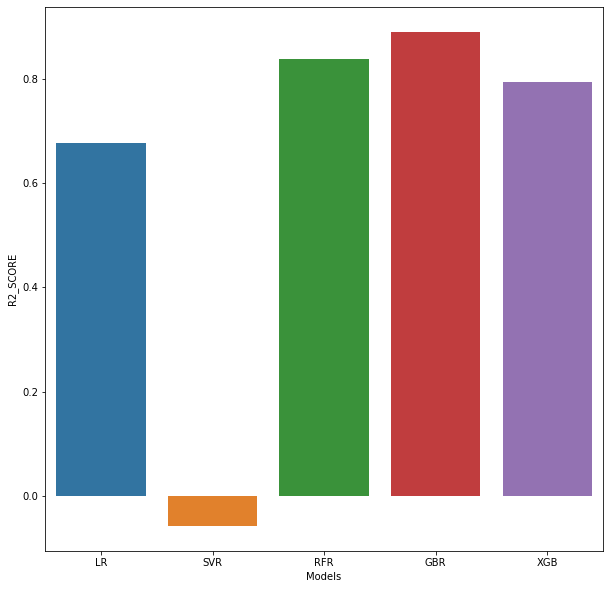

In [546]:
plt.figure(figsize=(10,10))
sns.barplot(x='Models',y='R2_SCORE',data=final_scores)

# Feature Importance

Random Forest

In [547]:
RFR.feature_importances_

array([0.03509554, 0.61805481, 0.03749525, 0.11291305, 0.16265867,
       0.02361395, 0.01016873])

In [548]:
Rf_fea = pd.Series(RFR.feature_importances_,index=X_train.columns)

<AxesSubplot:>

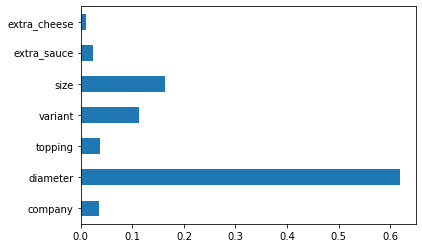

In [549]:
Rf_fea.plot(kind='barh')

Gradient Bossting Regressor 

In [550]:
GBR.feature_importances_

array([0.00604876, 0.63939764, 0.05298469, 0.10309975, 0.16200137,
       0.03345922, 0.00300857])

In [551]:
Gbr_fea = pd.Series(RFR.feature_importances_,index=X_train.columns)

<AxesSubplot:>

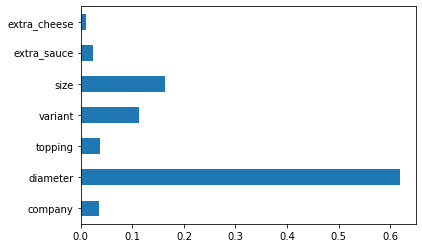

In [552]:
Gbr_fea.plot(kind='barh')

XGBRegressor

In [553]:
XGB.feature_importances_

array([0.00924028, 0.37611407, 0.01396628, 0.06699391, 0.46870452,
       0.05825096, 0.00673   ], dtype=float32)

In [554]:
Xgb_fea = pd.Series(RFR.feature_importances_,index=X_train.columns)

<AxesSubplot:>

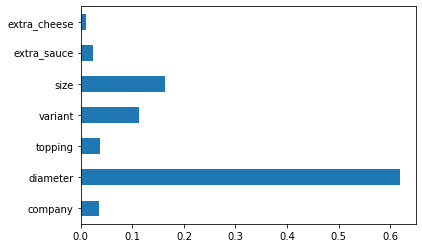

In [555]:
Xgb_fea.plot(kind='barh')

# Saving the Model

In [556]:
X = Data.drop('Price',axis=1)
y = Data['Price']

In [557]:
GBR = GradientBoostingRegressor()
GBR.fit(X,y)

GradientBoostingRegressor()

In [558]:
import joblib 

In [559]:
joblib.dump(GBR,'Pizza_Price_GBR_model')

['Pizza_Price_GBR_model']

In [560]:
Pizza_Price_Model = joblib.load('Pizza_Price_GBR_model')

In [561]:
Pizza_Price_Model.predict([[1,22.0,2,8,1,1,1]])

c:\Users\navee\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1250.7961654])

In [562]:
XGB = XGBRegressor()
XGB.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [563]:
joblib.dump(XGB,'Pizza_Price_XGB_model')

['Pizza_Price_XGB_model']

In [564]:
Pizza_Price_Model = joblib.load('Pizza_Price_XGB_model')

In [565]:
Pizza_Price_Model.predict([[1,22.0,2,8,1,1,1]])

array([1254.2548], dtype=float32)